/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([99, 1])) that is different to the input size (torch.Size([99])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


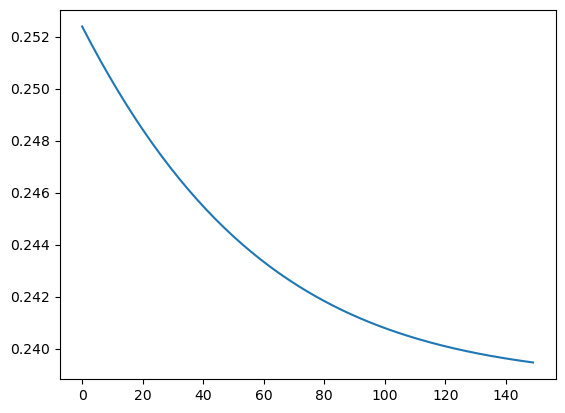

In [10]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

df = pd.read_csv('ex2data1.txt')
df.columns = ['marks1','marks2','admitted']

x1 = np.array(df['marks1'].values)
x2 = np.array(df['marks2'].values)



# normalisation
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x2_mean = np.mean(x2)
x2_std = np.std(x2)
x1 = (x1-x1_mean)/x1_std
x2 = (x2-x2_mean)/x2_std


#concatinating two normalised colums together
x_array = np.column_stack((x1, x2))
y_array = np.array(df['admitted'].values)

# converting the numpy arrays to tensors
x = torch.tensor(x_array, dtype = torch.float32)
y = torch.tensor(y_array, dtype = torch.float32).unsqueeze(1)

class logistic_regression(nn.Module):
    def __init__(self):
        super(logistic_regression, self).__init__()
        self.layer1 = nn.Linear(2,1, dtype=torch.float)
        self.layer2 = nn.Sigmoid()
    def forward(self,data):
        linear_out = self.layer1(data)
        sigmoid_out = self.layer2(linear_out)
        return sigmoid_out

model = logistic_regression()

loss_fn = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.1)
all_losses = []

for epoch in range(150):
    y_predict = model(x)
    loss = loss_fn(y_predict.squeeze(), y)
    all_losses.append(loss.detach().numpy())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
plt.plot(all_losses)

    